# Exercise 01.1

The numbers generated by the C++ program are stored in a file (```linear.txt```).
1. Compile and run the C++ program use:  
   ```make``` => ```./main.exe```  
   Alternatively, you can use the first code block in this jupyter notebook.
2. Read the generated numbers and save them in an array. Meanwhile, count the amount of generated numbers (by doing this way, if you want to generate more numbers, you just need to change ```main.cpp```).
3. Define the number of blocks and generate L (number of random draws per block).
4. Inside each block, compute $\langle d \rangle = \frac{\sum_{k=1}^{L}d_k}{L}$.
   Compute the variance too:
   $$\sigma^2 = \langle \left( d - \langle d \rangle \right)^2 \rangle = \frac{1}{L} \sum_{i=1}^{L} \left( d_i - \langle d \rangle \right)^2 = \frac{1}{L} \sum_{i=1}^{L} \left( d_i^2 - d_i \langle d \rangle \right) = \langle d^2 \rangle - \langle d \rangle^2$$
5. Compute average and variance as a function of the number of blocks (cumulative sum of the values computed at point 4). Compute the statistical uncertainty too.
   $$ \frac{\sigma}{\sqrt{N-1}} = \sqrt{ \frac{\langle d^2 \rangle - \langle d \rangle^2}{N-1}} $$
6. Make pictures showing $\langle d \rangle$ and its uncertainty as a function of the number of blocks. Expected value: $\langle d \rangle = \frac{1}{2}$.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import subprocess
import scipy.stats

def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)
    
titleSize = 20
axesLabelSize = 15
numbersGenerated = 0

with open('main.cpp', 'r') as reader:
    for line in reader:
        if line.startswith('#define generatedNumbers'):
            numbersGenerated = int(line.split()[-1])

distance = 103
length = 53

In [2]:
# (1)

# Do you want to change the number of generated numbers?
change = False
# Advice: newNumber should be greater than 10^7
newNumber = 100

if change:
    subprocess.check_output(["/bin/sh", "-c", "perl -i -pe \'s/define generatedNumbers .*.$/define generatedNumbers "+str(newNumber)+"/' main.cpp"])
    numbersGenerated = newNumber

subprocess.check_output(["/bin/sh", "-c", "make"]) # Compile the program
subprocess.check_output(["/bin/sh", "-c", "./main.exe"]) # Run the program

print('Done')

Done


10000000 numbers generated
100 blocks
100000 numbers generated per block


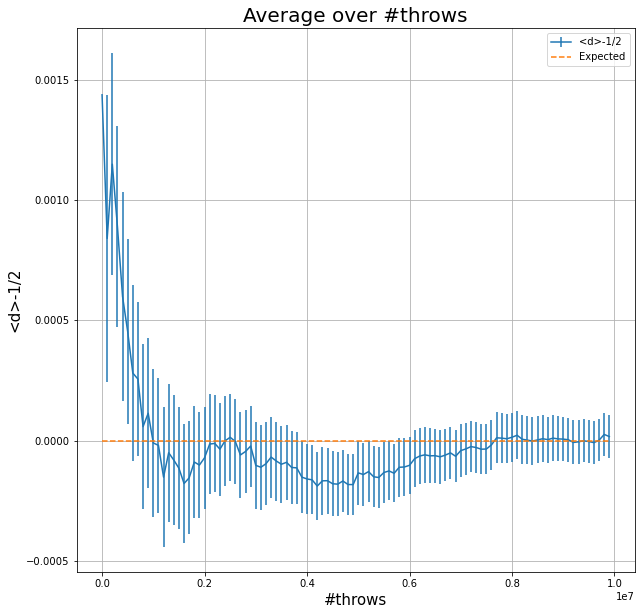

In [3]:
# (2)

dataArray = np.zeros(numbersGenerated)
i = 0
with open('linear.txt', 'r') as reader:
    for line in reader:
        dataArray[i] = float(line)
        i += 1

# (3)

print(numbersGenerated, 'numbers generated')
numberOfBlocks = 100
numbersPerBlock = int(numbersGenerated/numberOfBlocks)
print(numberOfBlocks, 'blocks')
print(numbersPerBlock, 'numbers generated per block')

if numbersPerBlock * numberOfBlocks != numbersGenerated:
    print('Warning! numbersGenerated is not a multiple of numberOfBlocks')
    
x = np.arange(numberOfBlocks)      # [0,1,2,...,N-1]
ave = np.zeros(numberOfBlocks)
av2 = np.zeros(numberOfBlocks)
sum_prog = np.zeros(numberOfBlocks)
su2_prog = np.zeros(numberOfBlocks)
err_prog = np.zeros(numberOfBlocks)
reference = np.zeros(numberOfBlocks)

# (4)

for i in range(numberOfBlocks):
    sum = 0
    for j in range(numbersPerBlock):
        sum += dataArray[j + i * numbersPerBlock]
    ave[i] = sum / numbersPerBlock
    av2[i] = (ave[i])**2

# (5)

for i in range(numberOfBlocks):
    for j in range(i+1):
        sum_prog[i] += ave[j] # SUM_{j=0,i} r_j
        su2_prog[i] += av2[j] # SUM_{j=0,i} (r_j)^2
    sum_prog[i]/=(i+1) # Cumulative average
    su2_prog[i]/=(i+1) # Cumulative square average
    err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
    

# (6)

x *= numbersPerBlock # Number of throws = block * (Number of throws in each block)

plt.figure(figsize=(10, 10)) 
plt.title('Average over #throws', fontsize=titleSize)
plt.errorbar(x, sum_prog-0.5,yerr=err_prog, label='<d>-1/2')
plt.errorbar(x, reference, fmt='--', label='Expected')
plt.legend(loc='upper right')
plt.xlabel('#throws', fontsize=axesLabelSize)
plt.ylabel('<d>-1/2', fontsize=axesLabelSize)
plt.grid(True)
plt.show()

7. Inside each block, compute the variance and its uncertainty.
   $$ \sigma^2 = \frac{1}{L} \sum_{i=1}^{L} \left( d_i - \frac{1}{2} \right)^2 $$
8. Compute alse the variance and its statistical uncertainty as a function of the number of blocks.
9. Make pictures showing $\langle \sigma^2 \rangle$ and its uncertainty as a function of the number of blocks. Expected value: $\sigma^2 = \frac{1}{12}$.

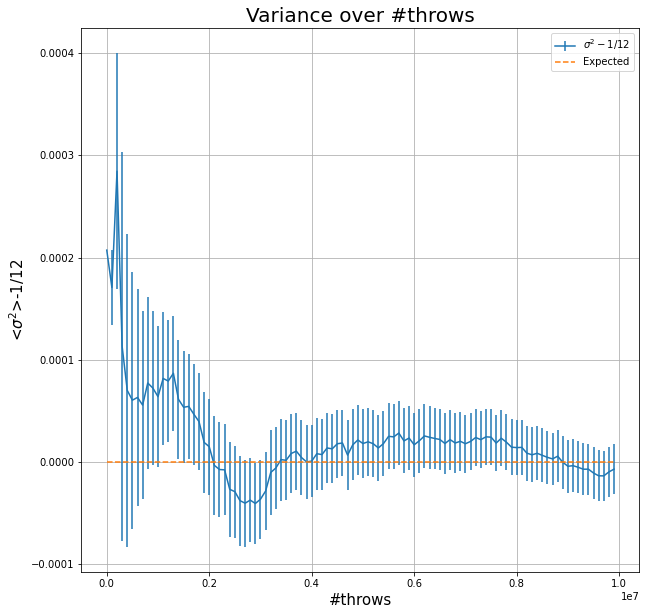

In [4]:
# Continue using variables and functions of the previous code cell
ave = np.zeros(numberOfBlocks)
av2 = np.zeros(numberOfBlocks)
sum_prog = np.zeros(numberOfBlocks)
su2_prog = np.zeros(numberOfBlocks)
err_prog = np.zeros(numberOfBlocks)

# (7)

for i in range(numberOfBlocks):
    sum = 0
    for j in range(numbersPerBlock):
        k = j + i * numbersPerBlock
        sum += (dataArray[k]-0.5)**2 # Accumulate measures
    ave[i] = sum / numbersPerBlock           # Estimate in each block 
    av2[i] = (ave[i])**2 

# (8)

for i in range(numberOfBlocks):
    for j in range(i+1):
        sum_prog[i] += ave[j] 
        su2_prog[i] += av2[j] 
    sum_prog[i]/=(i+1) # Cumulative average
    su2_prog[i]/=(i+1) # Cumulative square average
    err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty

# (9)

plt.figure(figsize=(10, 10)) 
plt.title('Variance over #throws', fontsize=titleSize)
plt.errorbar(x, sum_prog-1/12,yerr=err_prog, label='$\sigma^2-1/12$')
plt.errorbar(x, reference, fmt='--', label='Expected')
plt.legend(loc='upper right')
plt.xlabel('#throws', fontsize=axesLabelSize)
plt.ylabel('<$\sigma^2$>-1/12', fontsize=axesLabelSize)
plt.grid(True)
plt.show()

10. Implement the $\chi^2$ test.

In [5]:
# (10)

subIntervals = 100
throwsPerBlock = 10000
blockNumber = int(numbersGenerated/throwsPerBlock)
print(subIntervals, 'sub-intervals')
print(throwsPerBlock, 'throws per block')
print(blockNumber, 'number of blocks')
print('On average I expect', int(throwsPerBlock/subIntervals), 'events per sub-interval')


chiSquaredRange = 100
chi = np.zeros(chiSquaredRange)
for i in range(chiSquaredRange):
    numberEvents = np.zeros(subIntervals)
    for j in range(throwsPerBlock): # sommo su tutti i blocchi
        numberEvents[int((dataArray[i * throwsPerBlock + j]) * subIntervals)] += 1
    for j in range(subIntervals):
        chi[i] += ((numberEvents[j] - throwsPerBlock/subIntervals)**2)/(throwsPerBlock/subIntervals)

print('Done')

100 sub-intervals
10000 throws per block
1000 number of blocks
On average I expect 100 events per sub-interval
Done


103.35999999999997


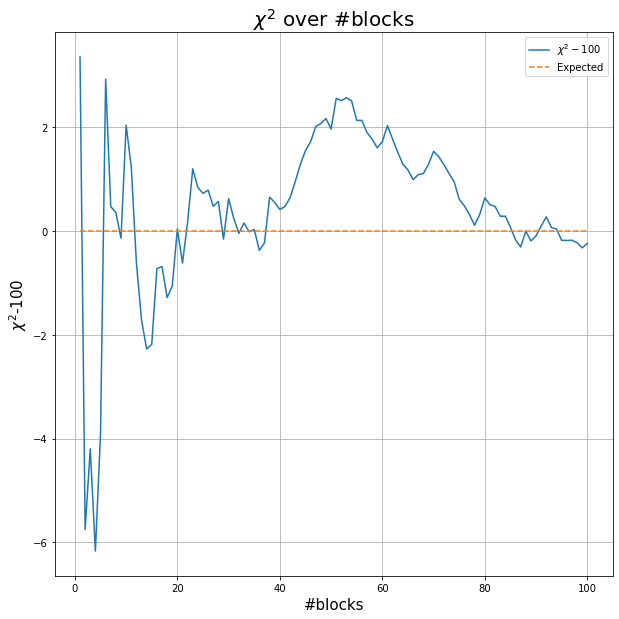

In [6]:
# separated from the block above because i don't want to repeat those for loops every time

average = np.zeros(chiSquaredRange)
sum = 0
for i in range(chiSquaredRange):
    sum += chi[i]
    average[i] += sum/float(i+1)
print(chi[0])
x_new = np.arange(chiSquaredRange)
plt.figure(figsize=(10, 10)) 
plt.title('$\chi^2$ over #blocks', fontsize=titleSize)
plt.plot(x_new+1, average-100, label='$\chi^2-100$')
plt.plot(x_new+1, np.zeros(chiSquaredRange), '--', label='Expected')
plt.legend(loc='upper right')
plt.xlabel('#blocks', fontsize=axesLabelSize)
plt.ylabel('$\chi^2$-100', fontsize=axesLabelSize)
plt.grid(True)
plt.show()

# Exercise 01.2

Having modified the generator in order to add two probability functions by using the method of the inversion of the cumulative distribution to sample from:
 - an exponential distribution
 $$p(x) = \lambda \exp(-\lambda x), x\in [0;+\infty]$$
 - a generic Cauchy-Lorentz distribution
 $$p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}, x\in [-\infty;+\infty]$$  

Make 3 pictures with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

In [7]:
def Fill_Array(s_x_y, data_array, n, RR, counter):  # Function for statistical uncertainty estimation
    if n==0:
        return np.zeros(RR), 0
    else:
        for i in range(RR):
            for j in range(n):
                s_x_y[i] += (data_array[counter + i * 2 + j]/n)
        counter += i + 1
        sum = 0
        for i in range(RR):
            sum += s_x_y[i]
        return s_x_y, counter
      

def gaussian(arr):
    plt.xlim((min(arr), max(arr)))
    mean = np.mean(arr)
    variance = np.var(arr)
    sigma = np.sqrt(variance)
    x = np.linspace(min(arr), max(arr), 100)
    return x, mean, sigma

def cauchy(arr):
    plt.xlim((min(arr), max(arr)))
    mean = np.mean(arr)
    variance = np.var(arr)
    sigma = np.sqrt(variance)
    x = np.linspace(min(arr), max(arr), 100)
    return x, mean, sigma

In [8]:
histogramArraySize = 10000
numberOfBins = 100
linearArray = np.zeros(numbersGenerated)
counter = 0
with open('linear.txt', 'r') as reader:
    for line in reader:
        linearArray[counter] = float(line)
        counter += 1
        
exponentialArray = np.zeros(numbersGenerated)
counter = 0
with open('exponential.txt', 'r') as reader:
    for line in reader:
        exponentialArray[counter] = float(line)
        counter += 1
    
cauchyArray = np.zeros(numbersGenerated)
counter = 0
with open('lorentzian.txt', 'r') as reader:
    for line in reader:
        cauchyArray[counter] = float(line)
        counter += 1
print('Done')

Done


In [9]:
def Draw_Histogram(argumentArray, numBins, plotTitle, distributionType):
    minRange = 0
    maxRange = 1
    if distributionType == 'Linear':
        minRange = 0
        maxRange = 1
        minRange_10 = 0.1
        maxRange_10 = 0.9
        minRange_100 = 0.4
        maxRange_100 = 0.6
    elif distributionType == 'Exponential':
        minRange = 0
        maxRange = 3
        minRange_10 = 0
        maxRange_10 = 3
        minRange_100 = 0.6
        maxRange_100 = 1.4
    else:
        minRange = -20
        maxRange = 20
        minRange_10 = -20
        maxRange_10 = 20
        minRange_100 = -20
        maxRange_100 = 20
    countInsideFunction = 0
    array_1 = np.zeros(histogramArraySize)
    array_2 = np.zeros(histogramArraySize)
    array_10 = np.zeros(histogramArraySize)
    array_100 = np.zeros(histogramArraySize)
    
    array_1, countInsideFunction = Fill_Array(array_1, argumentArray, 1, histogramArraySize, countInsideFunction)
    array_2, countInsideFunction = Fill_Array(array_2, argumentArray, 2, histogramArraySize, countInsideFunction)
    array_10, countInsideFunction = Fill_Array(array_10, argumentArray, 10, histogramArraySize, countInsideFunction)
    array_100, countInsideFunction = Fill_Array(array_100, argumentArray, 100, histogramArraySize, countInsideFunction)
    
    plt.figure(figsize=(10, 10))
    plt.suptitle(plotTitle, fontsize=titleSize) 
    
    plt.subplot(221)
    plt.xlim((minRange - 0.05, maxRange + 0.05))
    plt.hist(array_1, bins=numBins, range=[minRange,maxRange], density=1, label='N = 1')
    plt.title('N = 1', fontsize=axesLabelSize)
    plt.xlabel('x', fontsize=axesLabelSize)
    plt.ylabel('$p(x)$', fontsize=axesLabelSize)
    
    plt.subplot(222)
    plt.xlim((minRange - 0.05, maxRange + 0.05))
    plt.hist(array_2, bins=numBins, range=[minRange,maxRange], density=1, label='N = 2')
    plt.title('N = 2', fontsize=axesLabelSize)
    plt.xlabel('x', fontsize=axesLabelSize)
    plt.ylabel('$p(x)$', fontsize=axesLabelSize)
    
    plt.subplot(223)
    plt.xlim((minRange_10 - 0.05, maxRange_10 + 0.05))
    plt.hist(array_10, bins=numBins, range=[minRange,maxRange], density=1, label='N = 10')
    plt.title('N = 10', fontsize=axesLabelSize)
    plt.xlabel('x', fontsize=axesLabelSize)
    plt.ylabel('$p(x)$', fontsize=axesLabelSize)
    
    plt.subplot(224)
    plt.hist(array_100, bins=numBins, range=[minRange,maxRange], density=1, label='N = 100')
    plt.title('N = 100', fontsize=axesLabelSize)
    plt.xlabel('x', fontsize=axesLabelSize)
    plt.ylabel('$p(x)$', fontsize=axesLabelSize)
    
    if distributionType != 'Cauchy-Lorentz':
        x, mean, sigma = gaussian(array_100)
        plt.plot(x, scipy.stats.norm.pdf(x, mean, sigma), label='fit 100')
    else:
        x = np.linspace(scipy.stats.cauchy.ppf(0.01), scipy.stats.cauchy.ppf(0.99), 100)
        plt.plot(x, scipy.stats.cauchy.pdf(x), label='fit 100')

    plt.xlim((minRange_100 - 0.05, maxRange_100 + 0.05))
    plt.legend(loc='upper right')
    plt.show()

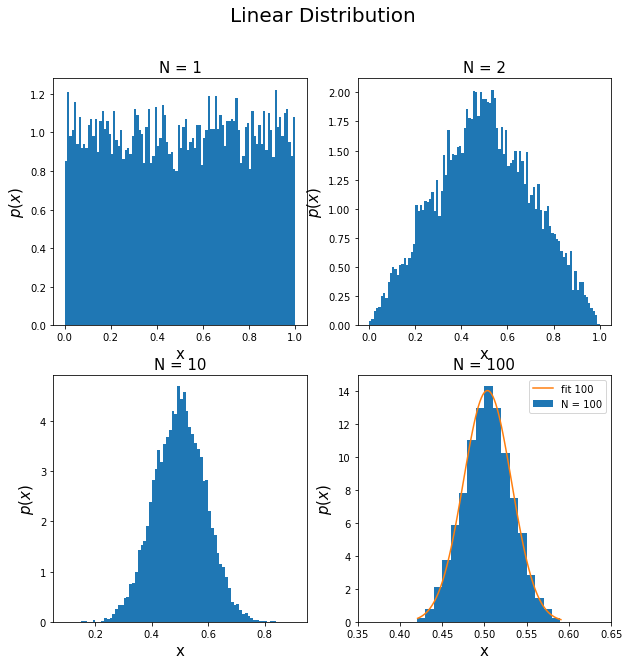

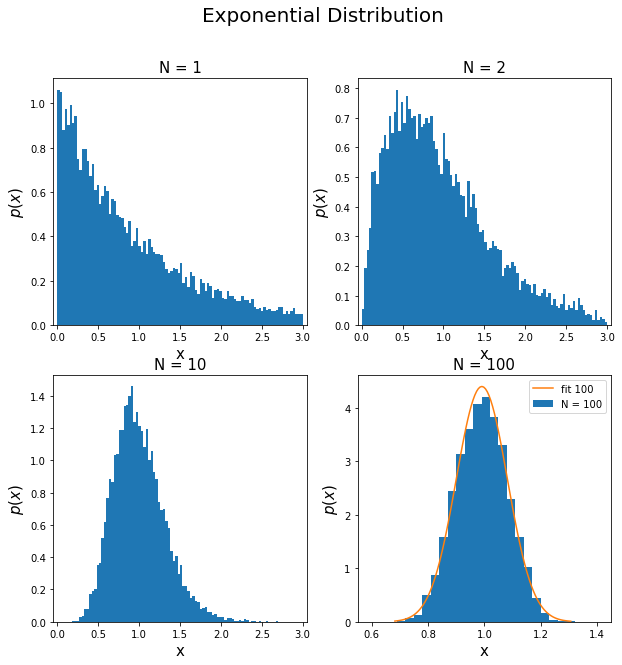

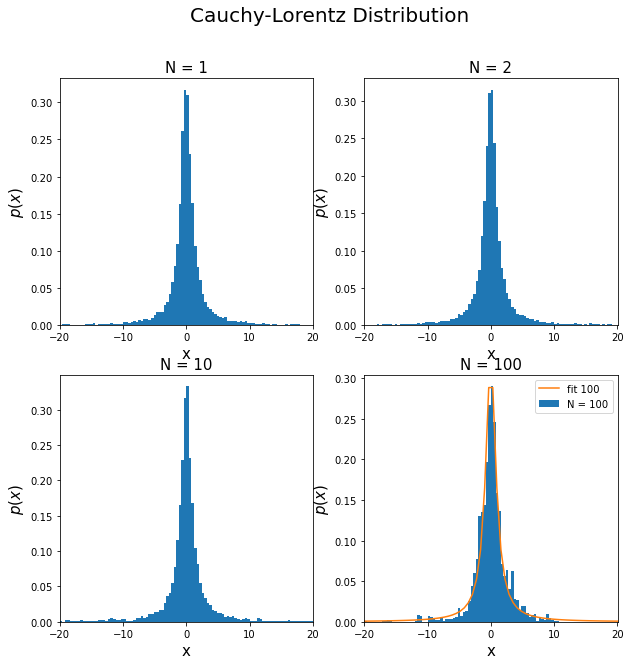

In [10]:
# continues from above

Draw_Histogram(linearArray, numberOfBins, 'Linear Distribution', 'Linear')

Draw_Histogram(exponentialArray, numberOfBins, 'Exponential Distribution', 'Exponential')

Draw_Histogram(cauchyArray, numberOfBins, 'Cauchy-Lorentz Distribution', 'Cauchy-Lorentz')

# Exercise 01.3

The pseudo-random (uniform) numbers (generated by the C++ program) are stored in a text file (```buffon.txt```).
1. Read the generated numbers;
2. Generate the position of the needle in the following way:
   - Position $y$ along the axis perpendicular to the lines;
   - Angle $\theta$ between the needle and the $y$ axis (counter-clockwise);
3. Given the symmetry of the problem, it is sufficient to generate the position $y$ between $0$ and $\frac{D}{2}$ and the angle $\theta$ between $0$ and $\frac{\pi}{2}$
4. The needle intersects a line if $ y \leq \frac{L}{2} \cos \left( \theta \right) $;
5. Compute average and variance of $ p = \frac{2L}{Pd} $ as a function of the number of blocks.

10000000 numbers generated
100 blocks
25000 numbers generated per block


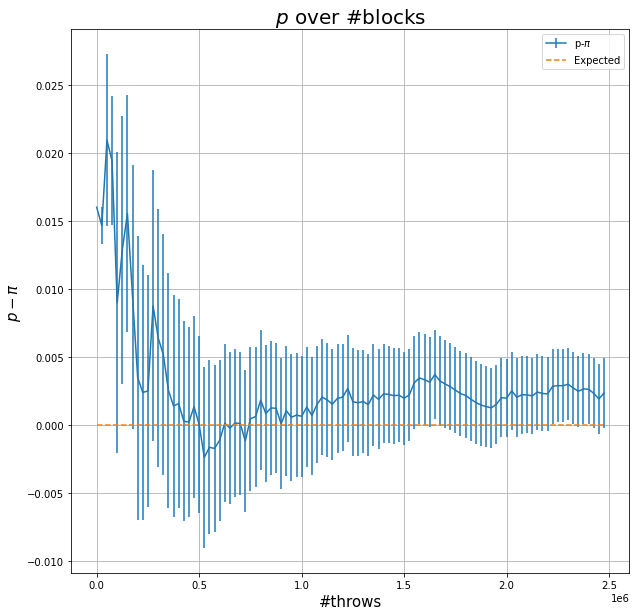

In [11]:
dataArrayBuffon = np.zeros(numbersGenerated)
i = 0 # numero totale di numeri generati
with open('buffon_theta.txt', 'r') as reader:
    for line in reader:
        dataArrayBuffon[i] = float(line)
        i += 1

print(numbersGenerated, 'numbers generated')
# I'm going to use half numbers here and half numbers in the code cell below
numbersToUse = int(numbersGenerated/2)
numberOfBlocks = 100
numbersPerBlock = int(numbersToUse/numberOfBlocks/2)
print(numberOfBlocks, 'blocks')
print(numbersPerBlock, 'numbers generated per block')


if numbersPerBlock * numberOfBlocks * 2 != numbersToUse:
    print('Warning! numbersGenerated is not a multiple of numberOfBlocks')
    
x = np.arange(numberOfBlocks)      # [0,1,2,...,N-1]
ave = np.zeros(numberOfBlocks)
av2 = np.zeros(numberOfBlocks)
sum_prog = np.zeros(numberOfBlocks)
su2_prog = np.zeros(numberOfBlocks)
err_prog = np.zeros(numberOfBlocks)


for i in range(numberOfBlocks):
    sum = 0
    for j in range(numbersPerBlock):
# (2)
        y = dataArrayBuffon[(j + i * numbersPerBlock)*2] * distance/2
        theta = dataArrayBuffon[(j + i * numbersPerBlock)*2+1]*math.pi/2
# (4)
        if y <= math.cos(theta)*length/2:
            sum += 1
    ave[i] = 2*length/((sum/numbersPerBlock)*distance)
    av2[i] = (ave[i])**2

# (5)

for i in range(numberOfBlocks):
    for j in range(i+1):
        sum_prog[i] += ave[j] # SUM_{j=0,i} r_j
        su2_prog[i] += av2[j] # SUM_{j=0,i} (r_j)^2
    sum_prog[i]/=(i+1) # Cumulative average
    su2_prog[i]/=(i+1) # Cumulative square average
    err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty


x *= numbersPerBlock # Number of throws = block * (Number of throws in each block)

plt.figure(figsize=(10, 10)) 
plt.title('$p$ over #blocks', fontsize=titleSize)
plt.errorbar(x, sum_prog-math.pi, yerr=err_prog, label='p-$\pi$')
plt.errorbar(x, np.zeros(numberOfBlocks), fmt='--', label='Expected')
plt.legend(loc='upper right')
plt.xlabel('#throws', fontsize=axesLabelSize)
plt.ylabel('$p-\pi$', fontsize=axesLabelSize)
plt.grid(True)
plt.show()

What if I want to avoid to use $\pi$ to evaluate $\pi$?

I changed the C++ program in order to generate a $(x,y)$ pair, where $x$ and $y$ are numbers sampled uniformly in the range $[0,1)$. With the accept-reject method, I accept the pair if $x^2+y^2 < 1$.  
The angle $\theta$ is then $\arctan \left( \frac{y}{x} \right)$.

10000000 numbers generated
100 blocks
50000 numbers generated per block


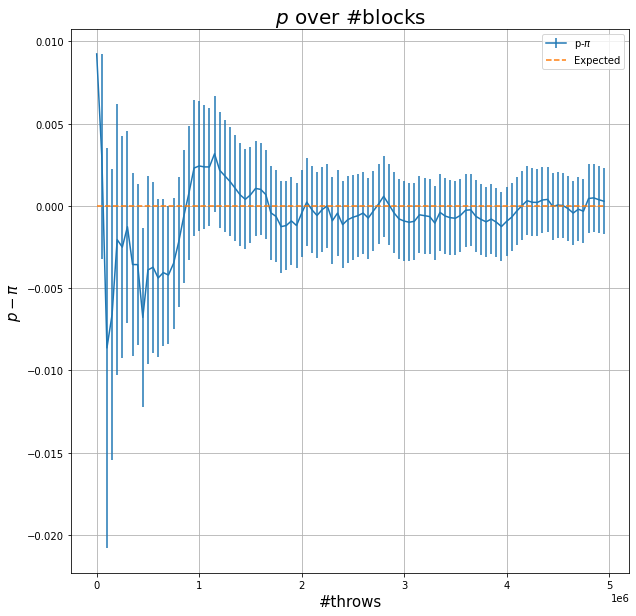

In [12]:

dataArrayBuffon = np.zeros(numbersGenerated)
i = 0 # numero totale di numeri generati
with open('buffon_mc.txt', 'r') as reader:
    for line in reader:
        dataArrayBuffon[i] = float(line)
        i += 1
    
# (1)

print(numbersGenerated, 'numbers generated')
# I'm going to use half numbers here and half numbers in the code cell below
numbersToUse = int(numbersGenerated)
numberOfBlocks = 100
numbersPerBlock = int(numbersToUse/numberOfBlocks/2)
print(numberOfBlocks, 'blocks')
print(numbersPerBlock, 'numbers generated per block')


if numbersPerBlock * numberOfBlocks * 2 != numbersToUse:
    print('Warning! numbersGenerated is not a multiple of numberOfBlocks')
    
x = np.arange(numberOfBlocks)      # [0,1,2,...,N-1]
ave = np.zeros(numberOfBlocks)
av2 = np.zeros(numberOfBlocks)
sum_prog = np.zeros(numberOfBlocks)
su2_prog = np.zeros(numberOfBlocks)
err_prog = np.zeros(numberOfBlocks)


for i in range(numberOfBlocks):
    sum = 0
    for j in range(numbersPerBlock):
# (2)
        y = dataArrayBuffon[(j + i * numbersPerBlock)*2] * distance/2
        theta = dataArrayBuffon[(j + i * numbersPerBlock)*2+1]
# (4)
        if y <= math.cos(theta)*length/2:
            sum += 1
    ave[i] = 2*length/((sum/numbersPerBlock)*distance)
    av2[i] = (ave[i])**2

# (5)

for i in range(numberOfBlocks):
    for j in range(i+1):
        sum_prog[i] += ave[j] # SUM_{j=0,i} r_j
        su2_prog[i] += av2[j] # SUM_{j=0,i} (r_j)^2
    sum_prog[i]/=(i+1) # Cumulative average
    su2_prog[i]/=(i+1) # Cumulative square average
    err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty


x *= numbersPerBlock # Number of throws = block * (Number of throws in each block)

plt.figure(figsize=(10, 10)) 
plt.title('$p$ over #blocks', fontsize=titleSize)
plt.errorbar(x, sum_prog-math.pi, yerr=err_prog, label='p-$\pi$')
plt.errorbar(x, np.zeros(numberOfBlocks), fmt='--', label='Expected')
plt.legend(loc='upper right')
plt.xlabel('#throws', fontsize=axesLabelSize)
plt.ylabel('$p-\pi$', fontsize=axesLabelSize)
plt.grid(True)
plt.show()